In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
telecom = pd.read_csv(r"C:\Users\utdstudent\Desktop\Jupyter\Telco-Customer-Churn.csv")

In [26]:
telecom_data= telecom.copy()

In [27]:
telecom_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
#telecom_data["SeniorCitizen"] = telecom_data.replace( { 'SeniorCitizen': { 'No': 0, 'Yes': 1 } } )
#data['Male'] = data['Gender'].map( {'male':1, 'female':0} )
telecom_data["Partner"] = telecom_data["Partner"].map({ 'No': 0, 'Yes': 1})
telecom_data["Dependents"] = telecom_data["Dependents"].map({ 'No': 0, 'Yes': 1})
telecom_data["gender"] = telecom_data["gender"].map({ 'Male': 0, 'Female': 1})
telecom_data["Churn"] = telecom_data["Churn"].map({ 'No': 0, 'Yes': 1})

In [29]:
telecom_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,0,0,0,0,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [30]:
#splitting the dataset to train and test datasets (7:3 ratio)

from sklearn.model_selection import train_test_split
train, test = train_test_split(telecom_data,test_size=0.3,random_state=0)

In [31]:
# Date column has been ignored in the dataset as it is not useful for our analysis. Also "rv1" and "rv2" has also been removed

col_gender = ["gender"]

col_senior = ["SeniorCitizen", "Partner","Dependents"]

col_tenure = ["tenure"] 

col_mcharge = ["MonthlyCharges"]

col_target = ["Churn"]

In [32]:
telecom_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,0,0,0,0,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [33]:
# setting the columns for the feature set of variables and the target variable
feature_variables_train = train[col_gender + col_senior + col_tenure + col_mcharge]
target_variables_train = train[col_target]
feature_variables_test = test[col_gender + col_senior + col_tenure + col_mcharge]
target_variables_test = test[col_target]

In [34]:
#Split training dataset into independent and dependent varibales
train_X = train[feature_variables_train.columns]
train_y = train[target_variables_train.columns]

In [35]:
test_X = test[feature_variables_test.columns]
test_y = test[target_variables_test.columns]

In [36]:
#Using StandardScaler to scale the values of the variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

train_modified = train[list(train_X.columns.values) ]

test_modified = test[list(test_X.columns.values)  ]



sc_train = pd.DataFrame(columns=train_modified.columns , index=train_modified.index)

sc_train[sc_train.columns] = sc.fit_transform(train_modified)

sc_test= pd.DataFrame(columns=test_modified.columns , index=test_modified.index)

sc_test[sc_test.columns] = sc.fit_transform(test_modified)

train_X1=sc_train
test_X1=sc_test
train_y1=train_y
test_y1=test_y

In [37]:
import time
from sklearn.neighbors import KNeighborsClassifier

def KNN(X_train,y_train,neighbors,metrics):
    model_KNN= KNeighborsClassifier( n_neighbors=neighbors, algorithm='auto', p=1, metric=metrics )
    start=time.time()
    model_KNN=model_KNN.fit(X_train,y_train)
    end=time.time()
    Diff=end-start
    return model_KNN,Diff

In [38]:
metrics=['manhattan','euclidean','chebyshev','minkowski']
model_knn_data2=[]
for i in metrics:
    parameters_knn2={}
    model_knn2,train_time10=KNN(train_X1,train_y1,5,i)
    parameters_knn2['Train_Time']=train_time10
    parameters_knn2['Train_Accuracy']=model_knn2.score(train_X1,train_y1)
    parameters_knn2['Train_Error']=1-parameters_knn2['Train_Accuracy']
    parameters_knn2['Test_Accuracy']=model_knn2.score(test_X1,test_y1)
    parameters_knn2['Test_Error']=1-parameters_knn2['Test_Accuracy']
    model_knn_data2.append(parameters_knn2)
    

<ipython-input-37-6ae9d82436b6>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model_KNN=model_KNN.fit(X_train,y_train)
<ipython-input-37-6ae9d82436b6>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model_KNN=model_KNN.fit(X_train,y_train)
<ipython-input-37-6ae9d82436b6>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model_KNN=model_KNN.fit(X_train,y_train)
<ipython-input-37-6ae9d82436b6>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model_KNN=model_KNN.fit(X_train,y_train)


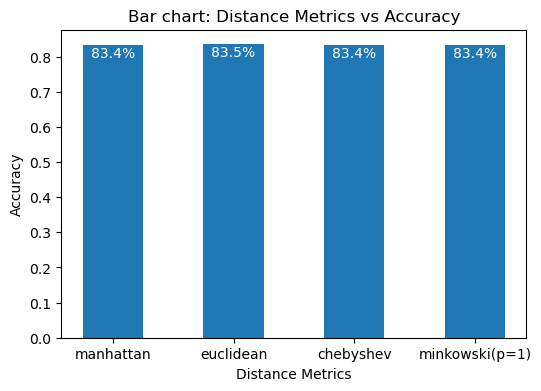

In [39]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

def label_bars(ax, bars, text_format, **kwargs):
    """
    Attaches a label on every bar of a regular or horizontal bar chart
    """
    ys = [bar.get_y() for bar in bars]
    y_is_constant = all(y == ys[0] for y in ys)  # -> regular bar chart, since all all bars start on the same y level (0)

    if y_is_constant:
        _label_bar(ax, bars, text_format, **kwargs)
    else:
        _label_barh(ax, bars, text_format, **kwargs)



def _label_bar(ax, bars, text_format, **kwargs):
    """
    Attach a text label to each bar displaying its y value
    """
    max_y_value = ax.get_ylim()[1]
    inside_distance = max_y_value * 0.05
    outside_distance = max_y_value * 0.01

    for bar in bars:
        text = text_format.format(bar.get_height())
        text_x = bar.get_x() + bar.get_width() / 2

        is_inside = bar.get_height() >= max_y_value * 0.15
        if is_inside:
            color = "white"
            text_y = bar.get_height() - inside_distance
        else:
            color = "black"
            text_y = bar.get_height() + outside_distance

        ax.text(text_x, text_y, text, ha='center', va='bottom', color=color, **kwargs)
        ax.set(xlabel='Distance Metrics', ylabel='Accuracy', title='Bar chart: Distance Metrics vs Accuracy')

def _label_barh(ax, bars, text_format, **kwargs):
    """
    Attach a text label to each bar displaying its y value
    Note: label always outside. otherwise it's too hard to control as numbers can be very long
    """
    max_x_value = ax.get_xlim()[1]
    distance = max_x_value * 0.0025

    for bar in bars:
        text = text_format.format(bar.get_width())

        text_x = bar.get_width() + distance
        text_y = bar.get_y() + bar.get_height() / 2

        ax.text(text_x, text_y, text, va='center', **kwargs)
        ax.set(xlabel='Distance Metrics', ylabel='Accuracy', title='Bar chart: Distance Metrics vs Accuracy')

objects = ['manhattan','euclidean','chebyshev','minkowski(p=1)']
y_pos = np.arange(len(objects))
performance=[]
for i in model_knn_data2:
    performance.append(i['Train_Accuracy'])

#plt.bar(y_pos, performance, align='center', alpha=0.5)
#plt.xticks(y_pos, objects)
#plt.ylabel('Accuracy')
#plt.title('Metrics')

fig10, ax10 = plt.subplots(figsize=(6, 4))
bars = ax10.bar(objects, performance, width=0.5, align="center")
value_format = "{:.1%}"  # displaying values as percentage with one fractional digit
label_bars(ax10, bars, value_format)

#for index,data in enumerate(performance):
#    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=8))
#plt.tight_layout()
#plt.show()

In [40]:
no_neighbors=[2,4,6,8,10,12,14,16,18,20]
model_knn_data=[]
for i in no_neighbors:
    parameters_knn={}
    model_knn,train_time=KNN(train_X1,train_y1,i,'euclidean')
    parameters_knn['Train_Time']=train_time
    parameters_knn['Train_Accuracy']=model_knn.score(train_X1,train_y1)
    parameters_knn['Train_Error']=1-parameters_knn['Train_Accuracy']
    parameters_knn['Test_Accuracy']=model_knn.score(test_X1,test_y1)
    parameters_knn['Test_Error']=1-parameters_knn['Test_Accuracy']
    parameters_knn['No_Neighbors']=i
    model_knn_data.append(parameters_knn)
    

<ipython-input-37-6ae9d82436b6>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model_KNN=model_KNN.fit(X_train,y_train)
<ipython-input-37-6ae9d82436b6>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model_KNN=model_KNN.fit(X_train,y_train)
<ipython-input-37-6ae9d82436b6>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model_KNN=model_KNN.fit(X_train,y_train)
<ipython-input-37-6ae9d82436b6>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model_KNN=model_KNN.fit(X_train,y_train)
<ipython-input-37-6ae9d82436b6>:7: DataConversionWarning: A colu

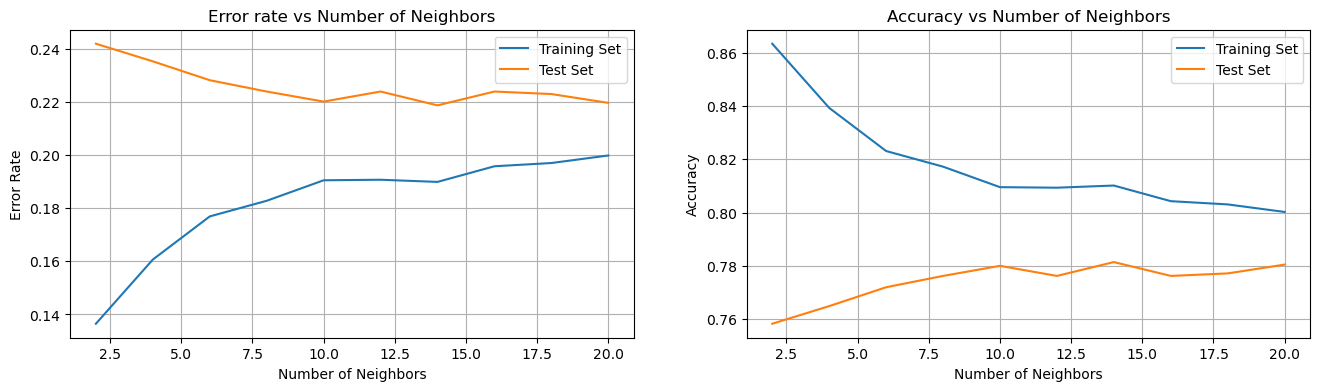

In [41]:
from matplotlib import pyplot as plt
TrainingError_knn=[]
TestingError_knn=[]
TrainingAccuracy_knn=[]
TestingAccuracy_knn=[]
for i in model_knn_data:
    TrainingError_knn.append(i["Train_Error"])
    TestingError_knn.append(i["Test_Error"])
    TrainingAccuracy_knn.append(i["Train_Accuracy"])
    TestingAccuracy_knn.append(i["Test_Accuracy"])
    
fig1, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(16,4))

ax1[0].plot(no_neighbors, TrainingError_knn, label='Training Set')
ax1[0].plot(no_neighbors, TestingError_knn, label='Test Set')
ax1[0].set(xlabel='Number of Neighbors', ylabel='Error Rate', title='Error rate vs Number of Neighbors')
ax1[0].grid()
ax1[0].legend(loc='upper right')

ax1[1].plot(no_neighbors, TrainingAccuracy_knn, label='Training Set')
ax1[1].plot(no_neighbors, TestingAccuracy_knn, label='Test Set')
ax1[1].set(xlabel='Number of Neighbors', ylabel='Accuracy', title='Accuracy vs Number of Neighbors')
ax1[1].grid()
ax1[1].legend(loc='upper right')


In [60]:
split=[1.0,0.8,0.6,0.4,0.2]
model_knn_data1=[]
for j in split:
    parameters_knn1={}
    trained_knn=pd.concat([train_X1, train_y1], axis = 1)
    tested_knn=pd.concat([test_X1,test_y1],axis=1)
    trained_knn=trained_knn.sample(frac=j, random_state=1)
    tested_knn=tested_knn.sample(frac=j, random_state=1)
    trained_knn_y=trained_knn['Churn']
    del trained_knn['Churn']
    trained_knn_X=trained_knn
    tested_knn_y=tested_knn['Churn']
    del tested_knn['Churn']
    tested_knn_X=tested_knn
    model_knn1, train_time1 = KNN(trained_knn_X,trained_knn_y,10,'euclidean')
    parameters_knn1['Train_Time']=train_time1
    parameters_knn1['Train_Accuracy']=model_knn1.score(trained_knn_X,trained_knn_y)
    parameters_knn1['Train_Error']=1-parameters_knn1['Train_Accuracy']
    parameters_knn1['Test_Accuracy']=model_knn1.score(tested_knn_X,tested_knn_y)
    parameters_knn1['Test_Error']=1-parameters_knn1['Test_Accuracy']
    model_knn_data1.append(parameters_knn1)

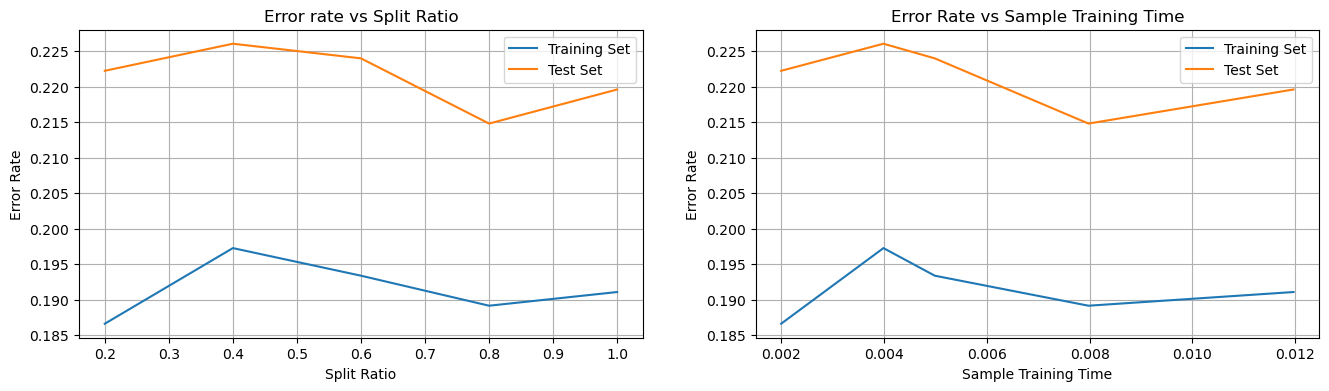

In [61]:
from matplotlib import pyplot as plt
TrainingError_knn1=[]
TestingError_knn1=[]
TrainingTime_knn1=[]
for i in model_knn_data1:
    TrainingError_knn1.append(i["Train_Error"])
    TestingError_knn1.append(i["Test_Error"])
    TrainingTime_knn1.append(i["Train_Time"])

    
fig2, ax2 = plt.subplots(nrows=1, ncols=2, figsize=(16,4))

ax2[0].plot(split, TrainingError_knn1, label='Training Set')
ax2[0].plot(split, TestingError_knn1, label='Test Set')
ax2[0].set(xlabel='Split Ratio', ylabel='Error Rate', title='Error rate vs Split Ratio')
ax2[0].grid()
ax2[0].legend(loc='upper right')

ax2[1].plot(TrainingTime_knn1, TrainingError_knn1, label='Training Set')
ax2[1].plot(TrainingTime_knn1, TestingError_knn1, label='Test Set')
ax2[1].set(xlabel='Sample Training Time', ylabel='Error Rate', title='Error Rate vs Sample Training Time')
ax2[1].grid()
ax2[1].legend(loc='upper right')


In [44]:
from sklearn.neural_network import MLPClassifier

def NeuralNetwork(X_train,y_train,activation_function,iterations,layers):
    model_NN= MLPClassifier( random_state=100, activation=activation_function, max_iter=iterations,hidden_layer_sizes=layers )
    start=time.time()
    model_NN=model_NN.fit(X_train,y_train)
    end=time.time()
    Diff=end-start
    return model_NN,Diff

In [67]:
iterations=[200,250,300,350,400]
model_nn_data=[]
for i in iterations:
    parameters_nn={}
    model_nn,train_time3=NeuralNetwork(train_X1,train_y1,'relu',i,(100,))
    parameters_nn['Train_Accuracy']=model_nn.score(train_X1,train_y1)
    parameters_nn['Train_Error']=1-parameters_nn['Train_Accuracy']
    parameters_nn['Test_Accuracy']=model_nn.score(test_X1,test_y1)
    parameters_nn['Test_Error']=1-parameters_nn['Test_Accuracy']
    model_nn_data.append(parameters_nn)

C:\Users\utdstudent\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\utdstudent\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\utdstudent\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\utdstudent\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

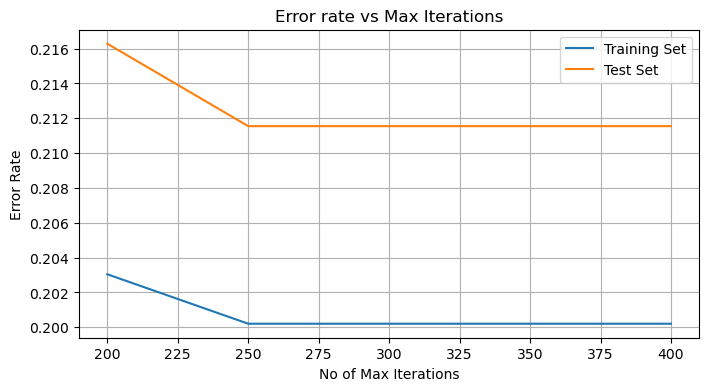

In [68]:
from matplotlib import pyplot as plt
TrainingError_nn=[]
TestingError_nn=[]

for i in model_nn_data:
    TrainingError_nn.append(i["Train_Error"])
    TestingError_nn.append(i["Test_Error"])


fig3, ax3 = plt.subplots(nrows=1, ncols=1, figsize=(8,4))

ax3.plot(iterations, TrainingError_nn, label='Training Set')
ax3.plot(iterations, TestingError_nn, label='Test Set')
ax3.set(xlabel='No of Max Iterations', ylabel='Error Rate', title='Error rate vs Max Iterations')
ax3.grid()
ax3.legend(loc='upper right')

In [69]:
Layers=[100]
Num_Layers=[1,2,3,4,5]
model_nn_data1=[]
for i in Num_Layers:
    parameters_nn1={}
    model_nn1,train_time4=NeuralNetwork(train_X1,train_y1,'relu',250,i*Layers)
    parameters_nn1['Train_Accuracy']=model_nn1.score(train_X1,train_y1)
    parameters_nn1['Train_Error']=1-parameters_nn1['Train_Accuracy']
    parameters_nn1['Test_Accuracy']=model_nn1.score(test_X1,test_y1)
    parameters_nn1['Test_Error']=1-parameters_nn1['Test_Accuracy']
    model_nn_data1.append(parameters_nn1)

C:\Users\utdstudent\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\utdstudent\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\utdstudent\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\utdstudent\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

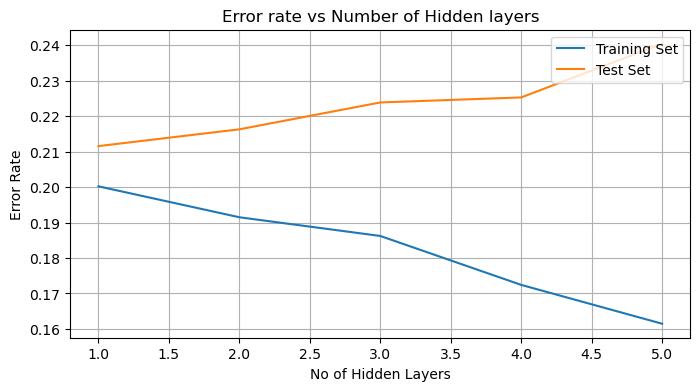

In [70]:
from matplotlib import pyplot as plt
TrainingError_nn1=[]
TestingError_nn1=[]

for i in model_nn_data1:
    TrainingError_nn1.append(i["Train_Error"])
    TestingError_nn1.append(i["Test_Error"])


fig4, ax4 = plt.subplots(nrows=1, ncols=1, figsize=(8,4))

ax4.plot(Num_Layers, TrainingError_nn1, label='Training Set')
ax4.plot(Num_Layers, TestingError_nn1, label='Test Set')
ax4.set(xlabel='No of Hidden Layers', ylabel='Error Rate', title='Error rate vs Number of Hidden layers')
ax4.grid()
ax4.legend(loc='upper right')

In [71]:
Num_Nodes=[50,100,150,200,250]
model_nn_data2=[]
for i in Num_Nodes:
    parameters_nn2={}
    No_Layers=[i,i,i,i]
    model_nn2,train_time5=NeuralNetwork(train_X1,train_y1,'relu',250,No_Layers)
    parameters_nn2['Train_Accuracy']=model_nn2.score(train_X1,train_y1)
    parameters_nn2['Train_Error']=1-parameters_nn2['Train_Accuracy']
    parameters_nn2['Test_Accuracy']=model_nn2.score(test_X1,test_y1)
    parameters_nn2['Test_Error']=1-parameters_nn2['Test_Accuracy']
    model_nn_data2.append(parameters_nn2)

C:\Users\utdstudent\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\utdstudent\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\utdstudent\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\utdstudent\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warning

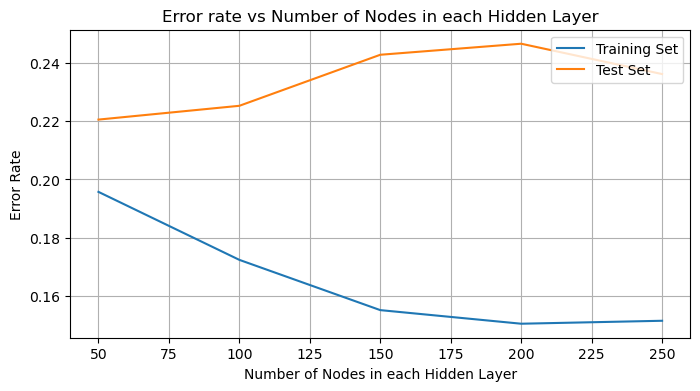

In [72]:
from matplotlib import pyplot as plt
TrainingError_nn2=[]
TestingError_nn2=[]

for i in model_nn_data2:
    TrainingError_nn2.append(i["Train_Error"])
    TestingError_nn2.append(i["Test_Error"])


fig5, ax5 = plt.subplots(nrows=1, ncols=1, figsize=(8,4))

ax5.plot(Num_Nodes, TrainingError_nn2, label='Training Set')
ax5.plot(Num_Nodes, TestingError_nn2, label='Test Set')
ax5.set(xlabel='Number of Nodes in each Hidden Layer', ylabel='Error Rate', title='Error rate vs Number of Nodes in each Hidden Layer')
ax5.grid()
ax5.legend(loc='upper right')

In [73]:
split=[1,0.9,0.8,0.7,0.6]
model_ann_data=[]
for j in split:
    parameters_ann={}
    trained_ann=pd.concat([train_X1, train_y1], axis = 1)
    tested_ann=pd.concat([test_X1,test_y1],axis=1)
    trained_ann=trained_ann.sample(frac=j, random_state=1)
    tested_ann=tested_ann.sample(frac=j, random_state=1)
    trained_ann_y=trained_ann['Churn']
    del trained_ann['Churn']
    trained_ann_X=trained_ann
    tested_ann_y=tested_ann['Churn']
    del tested_ann['Churn']
    tested_ann_X=tested_ann
    model_ann, train_time6 = NeuralNetwork(trained_ann_X,trained_ann_y,'relu',250,[150,150,150,150])
    parameters_ann['Train_Time']=train_time6
    parameters_ann['Train_Accuracy']=model_ann.score(trained_ann_X,trained_ann_y)
    parameters_ann['Train_Error']=1-parameters_ann['Train_Accuracy']
    parameters_ann['Test_Accuracy']=model_ann.score(tested_ann_X,tested_ann_y)
    parameters_ann['Test_Error']=1-parameters_ann['Test_Accuracy']
    model_ann_data.append(parameters_ann)
    print(parameters_ann)

C:\Users\utdstudent\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


{'Train_Time': 48.69053530693054, 'Train_Accuracy': 0.8503042596348884, 'Train_Error': 0.14969574036511157, 'Test_Accuracy': 0.7581637482252721, 'Test_Error': 0.2418362517747279}
{'Train_Time': 39.94538593292236, 'Train_Accuracy': 0.8338967771016452, 'Train_Error': 0.16610322289835477, 'Test_Accuracy': 0.7691903259726603, 'Test_Error': 0.23080967402733965}
{'Train_Time': 36.9504234790802, 'Train_Accuracy': 0.8511663286004056, 'Train_Error': 0.14883367139959436, 'Test_Accuracy': 0.7633136094674556, 'Test_Error': 0.23668639053254437}
{'Train_Time': 23.578450918197632, 'Train_Accuracy': 0.8400463633729354, 'Train_Error': 0.15995363662706463, 'Test_Accuracy': 0.7714672075726843, 'Test_Error': 0.22853279242731572}
{'Train_Time': 21.81940507888794, 'Train_Accuracy': 0.8451656524678837, 'Train_Error': 0.15483434753211633, 'Test_Accuracy': 0.7594637223974764, 'Test_Error': 0.2405362776025236}


In [76]:
LLayers=[100]
Num_Layers=[1,2,3,4,5]
model_nn_data_tanh=[]
for i in Num_Layers:
    parameters_nn_tanh={}
    model_nn1,train_time4=NeuralNetwork(train_X1,train_y1,'tanh',300,i*Layers)
    parameters_nn_tanh['Train_Accuracy']=model_nn1.score(train_X1,train_y1)
    parameters_nn_tanh['Train_Error']=1-parameters_nn1['Train_Accuracy']
    parameters_nn_tanh['Test_Accuracy']=model_nn1.score(test_X1,test_y1)
    parameters_nn_tanh['Test_Error']=1-parameters_nn1['Test_Accuracy']
    model_nn_data_tanh.append(parameters_nn_tanh)

C:\Users\utdstudent\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\utdstudent\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\utdstudent\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\utdstudent\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warning

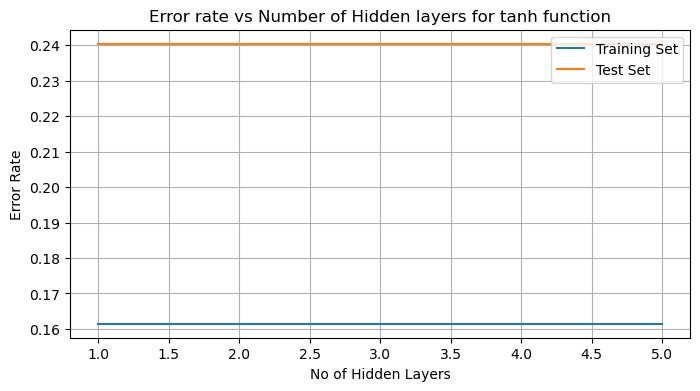

In [77]:
from matplotlib import pyplot as plt
TrainingError_nn_tanh=[]
TestingError_nn_tanh=[]

for i in model_nn_data_tanh:
    TrainingError_nn_tanh.append(i["Train_Error"])
    TestingError_nn_tanh.append(i["Test_Error"])


fig4, ax4 = plt.subplots(nrows=1, ncols=1, figsize=(8,4))

ax4.plot(Num_Layers, TrainingError_nn_tanh, label='Training Set')
ax4.plot(Num_Layers, TestingError_nn_tanh, label='Test Set')
ax4.set(xlabel='No of Hidden Layers', ylabel='Error Rate', title='Error rate vs Number of Hidden layers for tanh function')
ax4.grid()
ax4.legend(loc='upper right')

In [78]:
Layers=[100]
Num_Layers=[1,2,3,4,5]
model_nn_data_l=[]
for i in Num_Layers:
    parameters_nn_l={}
    model_nn1,train_time4=NeuralNetwork(train_X1,train_y1,'logistic',300,i*Layers)
    parameters_nn_l['Train_Accuracy']=model_nn1.score(train_X1,train_y1)
    parameters_nn_l['Train_Error']=1-parameters_nn1['Train_Accuracy']
    parameters_nn_l['Test_Accuracy']=model_nn1.score(test_X1,test_y1)
    parameters_nn_l['Test_Error']=1-parameters_nn1['Test_Accuracy']
    model_nn_data_l.append(parameters_nn_l)

C:\Users\utdstudent\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\utdstudent\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\utdstudent\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\utdstudent\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

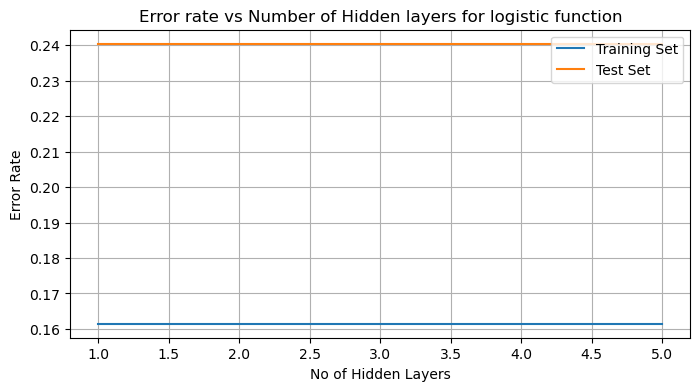

In [79]:
from matplotlib import pyplot as plt
TrainingError_nn_l=[]
TestingError_nn_l=[]

for i in model_nn_data_l:
    TrainingError_nn_l.append(i["Train_Error"])
    TestingError_nn_l.append(i["Test_Error"])


fig4, ax4 = plt.subplots(nrows=1, ncols=1, figsize=(8,4))

ax4.plot(Num_Layers, TrainingError_nn_l, label='Training Set')
ax4.plot(Num_Layers, TestingError_nn_l, label='Test Set')
ax4.set(xlabel='No of Hidden Layers', ylabel='Error Rate', title='Error rate vs Number of Hidden layers for logistic function')
ax4.grid()
ax4.legend(loc='upper right')

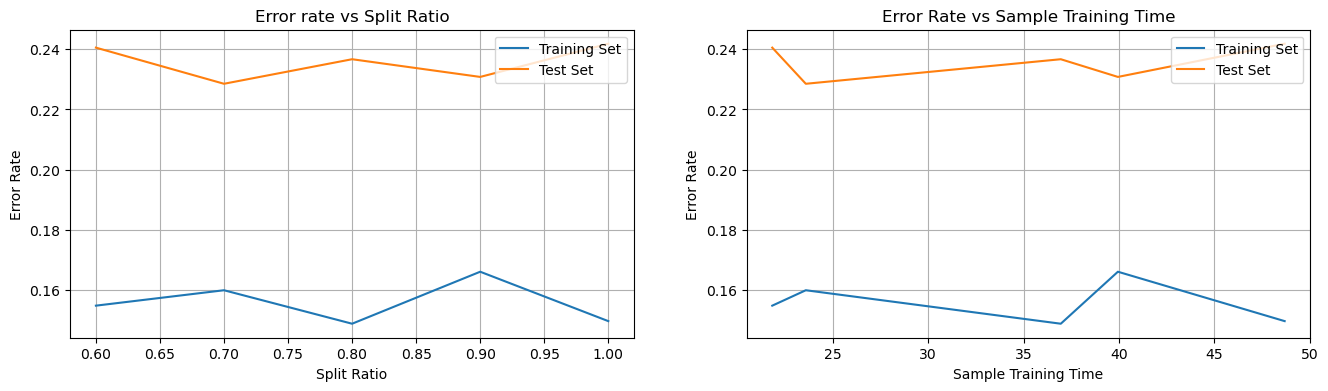

In [74]:
from matplotlib import pyplot as plt
TrainingError_ann=[]
TestingError_ann=[]
TrainingTime_ann=[]
for i in model_ann_data:
    TrainingError_ann.append(i["Train_Error"])
    TestingError_ann.append(i["Test_Error"])
    TrainingTime_ann.append(i["Train_Time"])

    
fig6, ax6 = plt.subplots(nrows=1, ncols=2, figsize=(16,4))

ax6[0].plot(split, TrainingError_ann, label='Training Set')
ax6[0].plot(split, TestingError_ann, label='Test Set')
ax6[0].set(xlabel='Split Ratio', ylabel='Error Rate', title='Error rate vs Split Ratio')
ax6[0].grid()
ax6[0].legend(loc='upper right')

ax6[1].plot(TrainingTime_ann, TrainingError_ann, label='Training Set')
ax6[1].plot(TrainingTime_ann, TestingError_ann, label='Test Set')
ax6[1].set(xlabel='Sample Training Time', ylabel='Error Rate', title='Error Rate vs Sample Training Time')
ax6[1].grid()
ax6[1].legend(loc='upper right')

<ipython-input-37-6ae9d82436b6>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model_KNN=model_KNN.fit(X_train,y_train)
C:\Users\utdstudent\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\utdstudent\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8352941176470589
0.8588235294117647


C:\Users\utdstudent\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utdstudent\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utdstudent\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utdstudent\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarnin

{'fit_time': array([0.01196098, 0.01196551, 0.01196122, 0.01197171, 0.01197052,
       0.0119698 , 0.01196671, 0.01096988, 0.01100111, 0.01296568]), 'score_time': array([0.01595879, 0.01695585, 0.01695538, 0.01595306, 0.01595569,
       0.01695132, 0.01595783, 0.01792145, 0.0169549 , 0.01695347]), 'test_score': array([0.77687627, 0.7505071 , 0.77687627, 0.76064909, 0.78904665,
       0.76064909, 0.77079108, 0.7464503 , 0.78093306, 0.78701826]), 'train_score': array([0.831643  , 0.83547442, 0.8336714 , 0.83840433, 0.83209376,
       0.8356998 , 0.8356998 , 0.83502366, 0.83637593, 0.8356998 ])}
{'fit_time': array([42.85317373, 48.70453048, 41.90090156, 39.36880994, 35.34250951,
       28.39036679, 39.39446211, 23.63789678, 51.30544615, 50.64508796]), 'score_time': array([0.00897598, 0.01097131, 0.0089767 , 0.0086391 , 0.00883675,
       0.00900674, 0.0083549 , 0.00832224, 0.00888109, 0.00800204]), 'test_score': array([0.76876268, 0.77484787, 0.75862069, 0.75456389, 0.78296146,
       0.7

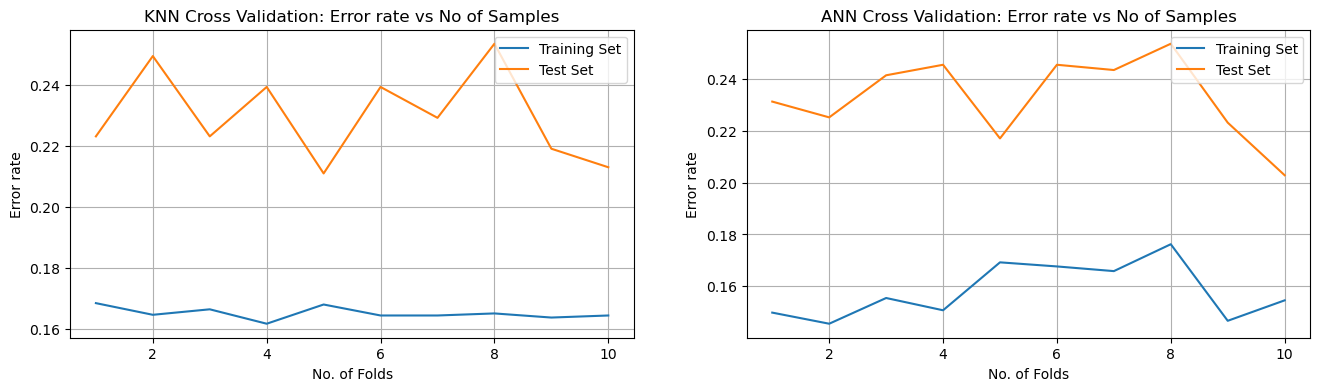

In [75]:
# Cross Validation function
from sklearn.model_selection import cross_validate

def CV(model,x,Y,folds):
    cv_results = cross_validate(model,x,Y,cv=folds, return_train_score = True)
    return(cv_results)

model_knn11, train_time11 = KNN(train_X1,train_y1,5,'euclidean')
model_knn12, train_time12 = NeuralNetwork(train_X1,train_y1,'relu',300,[150,150,150,150])
Accuracy_KNN=model_knn11.score(train_X1,train_y1)
Accuracy_ANN=model_knn12.score(train_X1,train_y1)
print(Accuracy_KNN)
print(Accuracy_ANN)

folds=[1,2,3,4,5,6,7,8,9,10]
Cross_Validation_data= CV(model_knn11,train_X1,train_y1,10)
Cross_Validation_data1= CV(model_knn12,train_X1,train_y1,10)
print(Cross_Validation_data)
print(Cross_Validation_data1)
Cross_Validation_Train_Error=[]
Cross_Validation_Test_Error=[]
Cross_Validation_Train_Error1=[]
Cross_Validation_Test_Error1=[]

for i  in Cross_Validation_data["train_score"]:
    Cross_Validation_Train_Error.append(1-i)

for i  in Cross_Validation_data["test_score"]:
    Cross_Validation_Test_Error.append(1-i)
    
for i  in Cross_Validation_data1["train_score"]:
    Cross_Validation_Train_Error1.append(1-i)

for i  in Cross_Validation_data1["test_score"]:
    Cross_Validation_Test_Error1.append(1-i)
    
#Cross_Validation_Train_Error=Cross_Validation_data["train_score"]
#Cross_Validation_Test_Error=Cross_Validation_data["test_score"]

fig11, ax11 = plt.subplots(nrows=1, ncols=2, figsize=(16,4))

ax11[0].plot(folds, Cross_Validation_Train_Error, label='Training Set')
ax11[0].plot(folds, Cross_Validation_Test_Error,label='Test Set')
ax11[0].set(xlabel='No. of Folds', ylabel='Error rate', title='KNN Cross Validation: Error rate vs No of Samples')
ax11[0].grid()
ax11[0].legend(loc='upper right')

ax11[1].plot(folds, Cross_Validation_Train_Error1, label='Training Set')
ax11[1].plot(folds, Cross_Validation_Test_Error1,label='Test Set')
ax11[1].set(xlabel='No. of Folds', ylabel='Error rate', title='ANN Cross Validation: Error rate vs No of Samples')
ax11[1].grid()
ax11[1].legend(loc='upper right')